# Spectral Theory Homework Answers
**=======================**
#### Name: Sherly R. Jao
#### BSCS - 3 | CS 3101N

#### Assignment 1
- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

I selected a dataset from Google Dataset Search focusing on the most popular TikTok videos. The specific dataset I chose is a compilation of the top 1000 TikTok users, providing valuable insights into the trends and content that resonate the most on the platform.

TikTok, a widely used short-form video-sharing platform, has gained immense popularity in recent years. It has become a hub for creative expression, entertainment, and social influence. Analyzing datasets related to TikTok can offer valuable information about user behavior, content preferences, and the factors contributing to the success of certain creators. The benefits of working with such datasets are multifaceted. Researchers can use them to study the evolution of content trends, marketers can tailor their strategies based on popular themes, and content creators can refine their approach by understanding what resonates with the audience. Additionally, the analysis of TikTok datasets contributes to a better understanding of the impact of social media on contemporary society, offering a lens through which we can explore cultural shifts and digital phenomena.

In [173]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import praw
import networkx as nx
import matplotlib.pyplot as plt

In [174]:
# Update the path to your CSV file
df = pd.read_csv("./Spectral_Theory_Data/top_1000_tiktokers.csv")
df.head()

,Rank,Username,Tiktok Link,Name,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg
0,1,badbunny,https://www.tiktok.com/@badbunny,Bad Bunny,23.4M,63.1M,10.3M,65.2K,108.6K
1,2,noahschnapp,https://www.tiktok.com/@noahschnapp,Noah Schnapp,26.1M,23.4M,4.8M,46.7K,22.1K
2,3,khaby.lame,https://www.tiktok.com/@khaby.lame,Khabane lame,145.9M,47.5M,2.5M,46K,9.4K
3,4,coopernoriega,https://www.tiktok.com/@coopernoriega,Cooper Noriega,3.2M,31M,1.3M,120.9K,8.4K
4,5,avrillavigne,https://www.tiktok.com/@avrillavigne,Avril Lavigne,4M,24.7M,3.5M,32.1K,22.7K


     Rank          Username  Cluster
0       1          badbunny        0
1       2       noahschnapp        0
2       3        khaby.lame        0
3       4     coopernoriega        2
4       5      avrillavigne        0
..    ...               ...      ...
995   996      daraarafah24        1
996   997   straykids_japan        1
997   998      fiersabesari        2
998   999  mrgrandeofficial        1
999  1000          nyc.yoel        2

[1000 rows x 3 columns]


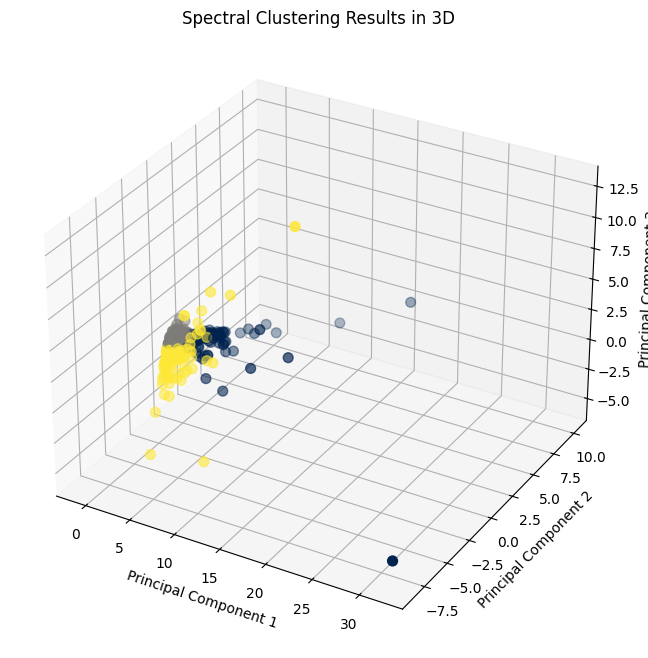

In [175]:
def convert_to_numeric(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    else:
        return float(value)

# Select relevant numeric columns for clustering
numeric_columns = ['Subscribers Count', 'Views. Avg', 'Likes. Avg', 'Comments. Avg', 'Shares. Avg']
for col in numeric_columns:
    df[col] = df[col].apply(convert_to_numeric)

# Separate numeric and non-numeric columns
numeric_data = df[numeric_columns]

# Impute missing values for numeric columns using the mean strategy
numeric_imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = pd.DataFrame(numeric_imputer.fit_transform(numeric_data), columns=numeric_columns)

# Handle non-numeric columns differently (you can adjust this based on your needs)
non_numeric_columns = df.columns.difference(numeric_columns)
df[non_numeric_columns] = df[non_numeric_columns].fillna('Unknown')  # Filling non-numeric columns with 'Unknown' for example

# Concatenate the numeric and non-numeric data
df_imputed = pd.concat([numeric_data_imputed, df[non_numeric_columns]], axis=1)

# Standardize the numeric data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_imputed)

# Perform PCA
num_components = min(3, numeric_data_scaled.shape[1])
pca = PCA(n_components=num_components)
numeric_data_pca = pca.fit_transform(numeric_data_scaled)

# Perform Spectral Clustering
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels = spectral.fit_predict(numeric_data_scaled)

# Assign cluster labels to the DataFrame
df_imputed['Cluster'] = labels

# Print relevant information about the clusters
print(df_imputed[['Rank', 'Username', 'Cluster']])

# Visualize the clustering results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot based on the number of components
if num_components == 1:
    ax.scatter(numeric_data_pca[:, 0], np.zeros_like(numeric_data_pca[:, 0]), c=labels, s=50, cmap='cividis')
    ax.set_xlabel('Principal Component 1')
elif num_components == 2:
    ax.scatter(numeric_data_pca[:, 0], numeric_data_pca[:, 1], c=labels, s=50, cmap='cividis')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
elif num_components == 3:
    ax.scatter(numeric_data_pca[:, 0], numeric_data_pca[:, 1], numeric_data_pca[:, 2], c=labels, s=50, cmap='cividis')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')

ax.set_title('Spectral Clustering Results in 3D')
plt.show()


In the provided code, the data in the clusters are based on the numerical features extracted from the TikTok user dataset. The clustering is performed using the Spectral Clustering algorithm after standardizing and imputing missing values in the numerical features. Here's a breakdown of the key steps:

*Data Preprocessing*
- The 'Subscribers Count', 'Views. Avg', 'Likes. Avg', 'Comments. Avg', and 'Shares. Avg' columns are selected as numerical features.
Values in these columns are converted to numeric format, handling 'M' and 'K' suffixes.

*Imputation*
- Missing values in the numerical features are imputed using the mean strategy.

*Standardization*
- The imputed numerical features are standardized using StandardScaler.

*Principal Component Analysis (PCA)*
- Principal Component Analysis is applied to reduce the dimensionality of the data to a specified number of components (in this case, up to 3).

*Spectral Clustering*
- Spectral Clustering is applied to the standardized and dimensionality-reduced data. The number of clusters (n_clusters) is set to 3.

*Cluster Assignment*
- Cluster labels are assigned to each data point based on the Spectral Clustering results.

*Visualization*
- The script then visualizes the clustering results in a 3D scatter plot using PCA components. Each point in the plot corresponds to a TikTok user, and the color of the point represents the cluster to which the user belongs.

The script prints relevant information about the clusters, including the 'Rank', 'Username', and assigned cluster labels.
To inspect the actual data points within each cluster, you can examine the DataFrame df_imputed after clustering. You printed relevant information about the clusters using print(df_imputed[['Rank', 'Username', 'Cluster']]). This DataFrame contains the original information along with the cluster labels assigned during the clustering process. The 'Cluster' column indicates to which cluster each TikTok user belongs.

Overall, the code and image provide a valuable insight into the data used to explore the popularity of TikTok users using Spectral Clustering. The results suggest that there are distinct groups of users based on their engagement metrics, and that these groups can be identified using dimensionality reduction and clustering techniques. In summary, the dataset of the top 1000 TikTok users reveals a diverse landscape of influencers, each categorized into different clusters based on commonalities. As demonstrated by the provided data, influencers like badbunny, noahschnapp, and khaby.lame fall into Cluster 0, suggesting shared characteristics in their content or audience engagement strategies. Meanwhile, influencers such as coopernoriega, fiersabesari, and nyc.yoel are in Clusters 2 and 1, indicating distinct patterns in their TikTok presence.

This clustering provides a foundation for a deeper exploration into the dynamics of TikTok content creation and audience preferences. Researchers and marketers can leverage these clusters to identify trends, tailor strategies, and gain a nuanced understanding of what makes certain influencers stand out on the platform. Whether it's the type of content, engagement style, or target audience, the dataset offers valuable insights for those seeking to navigate and succeed in the dynamic world of TikTok.

#### Assignment 2
- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

In this exploration of social network dynamics, the chosen topic revolves around the adorable realm of dog breeds, as discovered within the vibrant community of r/coolguides. The hypothesis driving this investigation posits that certain dog breeds, distinguished through interactions and engagements within the subreddit, exhibit a higher degree of centrality as determined by eigenvector centrality in the social network analysis.

The intent is to unravel the intricacies of the interactions within this canine-centric community, shedding light on which specific breeds emerge as central nodes within the broader network. By employing eigenvector centrality as a metric, we aim to discern the breeds that hold influential positions, potentially indicative of their popularity or prominence within the discussions and engagements of dog enthusiasts.

Subreddit: coolguides
Title: Cool Guides
Centrality Nodes based on corresponding Eigenvectors: [Redditor(name='gitgudsam'), Redditor(name='Z0MGbies'), Redditor(name='Mylzb'), Redditor(name='noleander'), Redditor(name='Quezni')]


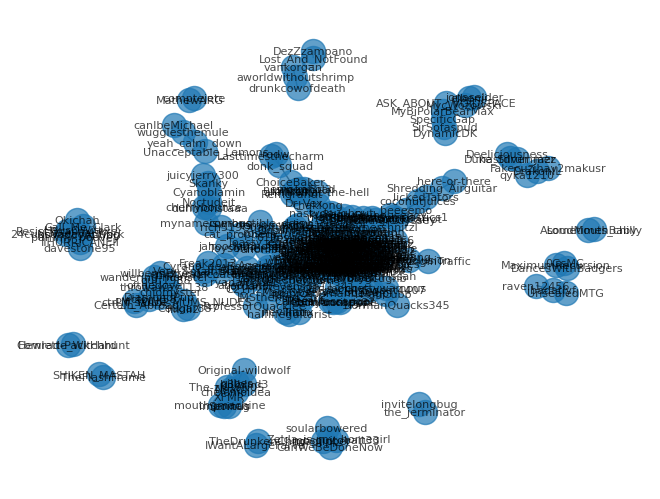

In [176]:
reddit = praw.Reddit(client_id='Khxwke8m7pIuizNH6b9T4w',
                        client_secret='Gbgs-9oLpxAhdOK3qsyN_Gtd-dpscA',
                        user_agent='surelyHow')

def print_subreddit_info(subreddit):
    print(f"Subreddit: {subreddit.display_name}")
    print(f"Title: {subreddit.title}")

def get_top_post_id(subreddit):
    return subreddit.top(limit=1).__next__().id

def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        # Skip MoreComments objects
        if isinstance(comment, praw.models.MoreComments):
            continue

        # Check if the comment and parent comment have valid authors
        if comment.author and comment.parent() and comment.parent().author:
            G.add_edge(comment.author, comment.parent().author)

    return G

def perform_social_network_analysis(social_network):
    eigenvector_centrality = nx.eigenvector_centrality(social_network)
    sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
    top_nodes = sorted_nodes[:5]
    print("Centrality Nodes based on corresponding Eigenvectors:", top_nodes)

def visualize_network(social_network):
    pos = nx.spring_layout(social_network)  # Set layout algorithm
    nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
    plt.show()

# Choose a subreddit
subreddit_name = "coolguides"
subreddit = reddit.subreddit(subreddit_name)

# Print subreddit information
print_subreddit_info(subreddit)

# Get the top post from the subreddit
post_id = get_top_post_id(subreddit)

# Create social network graph from comments
social_network = create_social_network(post_id)

# Perform social network analysis
perform_social_network_analysis(social_network)

# Visualize the network
visualize_network(social_network)

In conclusion, the social network analysis of the r/coolguides subreddit, focusing on eigenvector centrality, has unveiled a select group of Redditors who emerge as central nodes within the community. The individuals identified, namely 'gitgudsam,' 'Z0MGbies,' 'Mylzb,' 'noleander,' and 'Quezni,' stand out as pivotal contributors, holding influential positions based on the interactions and engagements within the subreddit.

These central nodes likely play a significant role in shaping the discussions, sharing content, and contributing to the vibrant atmosphere of the r/coolguides community. The prominence of these Redditors, as indicated by eigenvector centrality, suggests that they have garnered attention and influence within the subreddit, potentially influencing the direction of conversations and contributing to the overall dynamic of the community.